# Hospital Readmission

## Background

WellnessWorks is a healthcare company specializing in providing comprehensive health
services, including patient care, diagnostics, and preventive health measures. They aim to
leverage machine learning techniques to predict patient readmissions, improve patient outcomes,
and optimize hospital operations.

You have been hired as a Junior Data Analyst by Blink Health Solutions, the IT partner of
WellnessWorks. Blink Health wants you to investigate machine learning and its impact on
healthcare analytics. Additionally, you are required to develop a machine learning model for
WellnessWorks that can predict the likelihood of patient readmissions based on historical patient
data.

## Dataset

* Original Source: [Kaggle/datasets/dubradave/hospital-readmissions](https://kaggle.com/datasets/dubradave/hospital-readmissions)
* Import Source: [HuggingFace/datasets/prabinpanta0/genki_hospital](https://huggingface.co/datasets/prabinpanta0/genki_hospital)

## Import Nessecery packages

In [37]:
#import modules and packages needed
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import legend
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split

import huggingface as hf

## Loading the dataset

In [38]:
# Load the data
df = pd.read_csv("hf://datasets/prabinpanta0/genki_hospital/hospital_readmissions.csv")

## Data

10 years of patient information:

Information in the file

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

In [39]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [40]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

## Data Cleaning

### renaming some columns

In [41]:
#renaming some columns

df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


### Converting the age column to categorical data

In [42]:
#converting age column to categorical data
#checking for the unique values in the age column
print(df['age'].unique())

#creating a new column called age_cat
df['age_cat'] = df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')
#converting column type to categorical data type
df['age_cat'] = df['age_cat'].astype('category')
print('dtype :',df['age_cat'].dtype)

#viewing age and age_cat columns
df[['age','age_cat']]

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


dtype : category


,age,age_cat
0,[70-80),senior-old age
1,[70-80),senior-old age
2,[50-60),late-middle age
3,[70-80),senior-old age
4,[60-70),mid-old age
...,...,...
24995,[80-90),very senior-old
24996,[80-90),very senior-old
24997,[70-80),senior-old age
24998,[70-80),senior-old age


### drop age column

In [43]:
#drop age column
df.drop('age', axis=1, inplace=True)

#changing data type to the correct data type
# Columns to be converted to categorical datatype
cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']

# Convert columns to categorical datatype
df[cols_to_convert] = df[cols_to_convert].astype('category')
#checking data type
df.dtypes

time_in_hospital          int64
n_lab_procedures          int64
n_procedures              int64
n_medications             int64
n_outpatient              int64
n_inpatient               int64
n_emergency               int64
medical_specialty      category
primary_diagnosis      category
sec_diagnosis          category
additional_sec_diag    category
glucose_test           category
HbA1ctest              category
med_change             category
diabetes_med           category
readmitted             category
age_cat                category
dtype: object

The dataset contained 2500 rows and 17 columns, and these were what I did to the columns:

- There were no missing or duplicates data in the dataframe.
- The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively
- For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively.
- The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type

At the end there was 2500 rows and 17 columns .

## DATA ANALYSIS

In [44]:
# Complete analysis of the dataset
df.describe()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [45]:
#describing the categorical columns
df.describe(exclude=[np.number])

,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,7,8,8,8,3,3,2,2,2,6
top,Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


### Viewing the unique values in the dataset

In [46]:
# Checking the unique values in the dataset
df.nunique()

time_in_hospital        14
n_lab_procedures       109
n_procedures             7
n_medications           70
n_outpatient            23
n_inpatient             16
n_emergency             21
medical_specialty        7
primary_diagnosis        8
sec_diagnosis            8
additional_sec_diag      8
glucose_test             3
HbA1ctest                3
med_change               2
diabetes_med             2
readmitted               2
age_cat                  6
dtype: int64

### checking the null value

In [47]:
#checking the null value
df.isnull().sum()


time_in_hospital       0
n_lab_procedures       0
n_procedures           0
n_medications          0
n_outpatient           0
n_inpatient            0
n_emergency            0
medical_specialty      0
primary_diagnosis      0
sec_diagnosis          0
additional_sec_diag    0
glucose_test           0
HbA1ctest              0
med_change             0
diabetes_med           0
readmitted             0
age_cat                0
dtype: int64

### Checking the duplicate values

In [48]:
# Checking the duplicate values
df.duplicated().sum()


0

### visualization

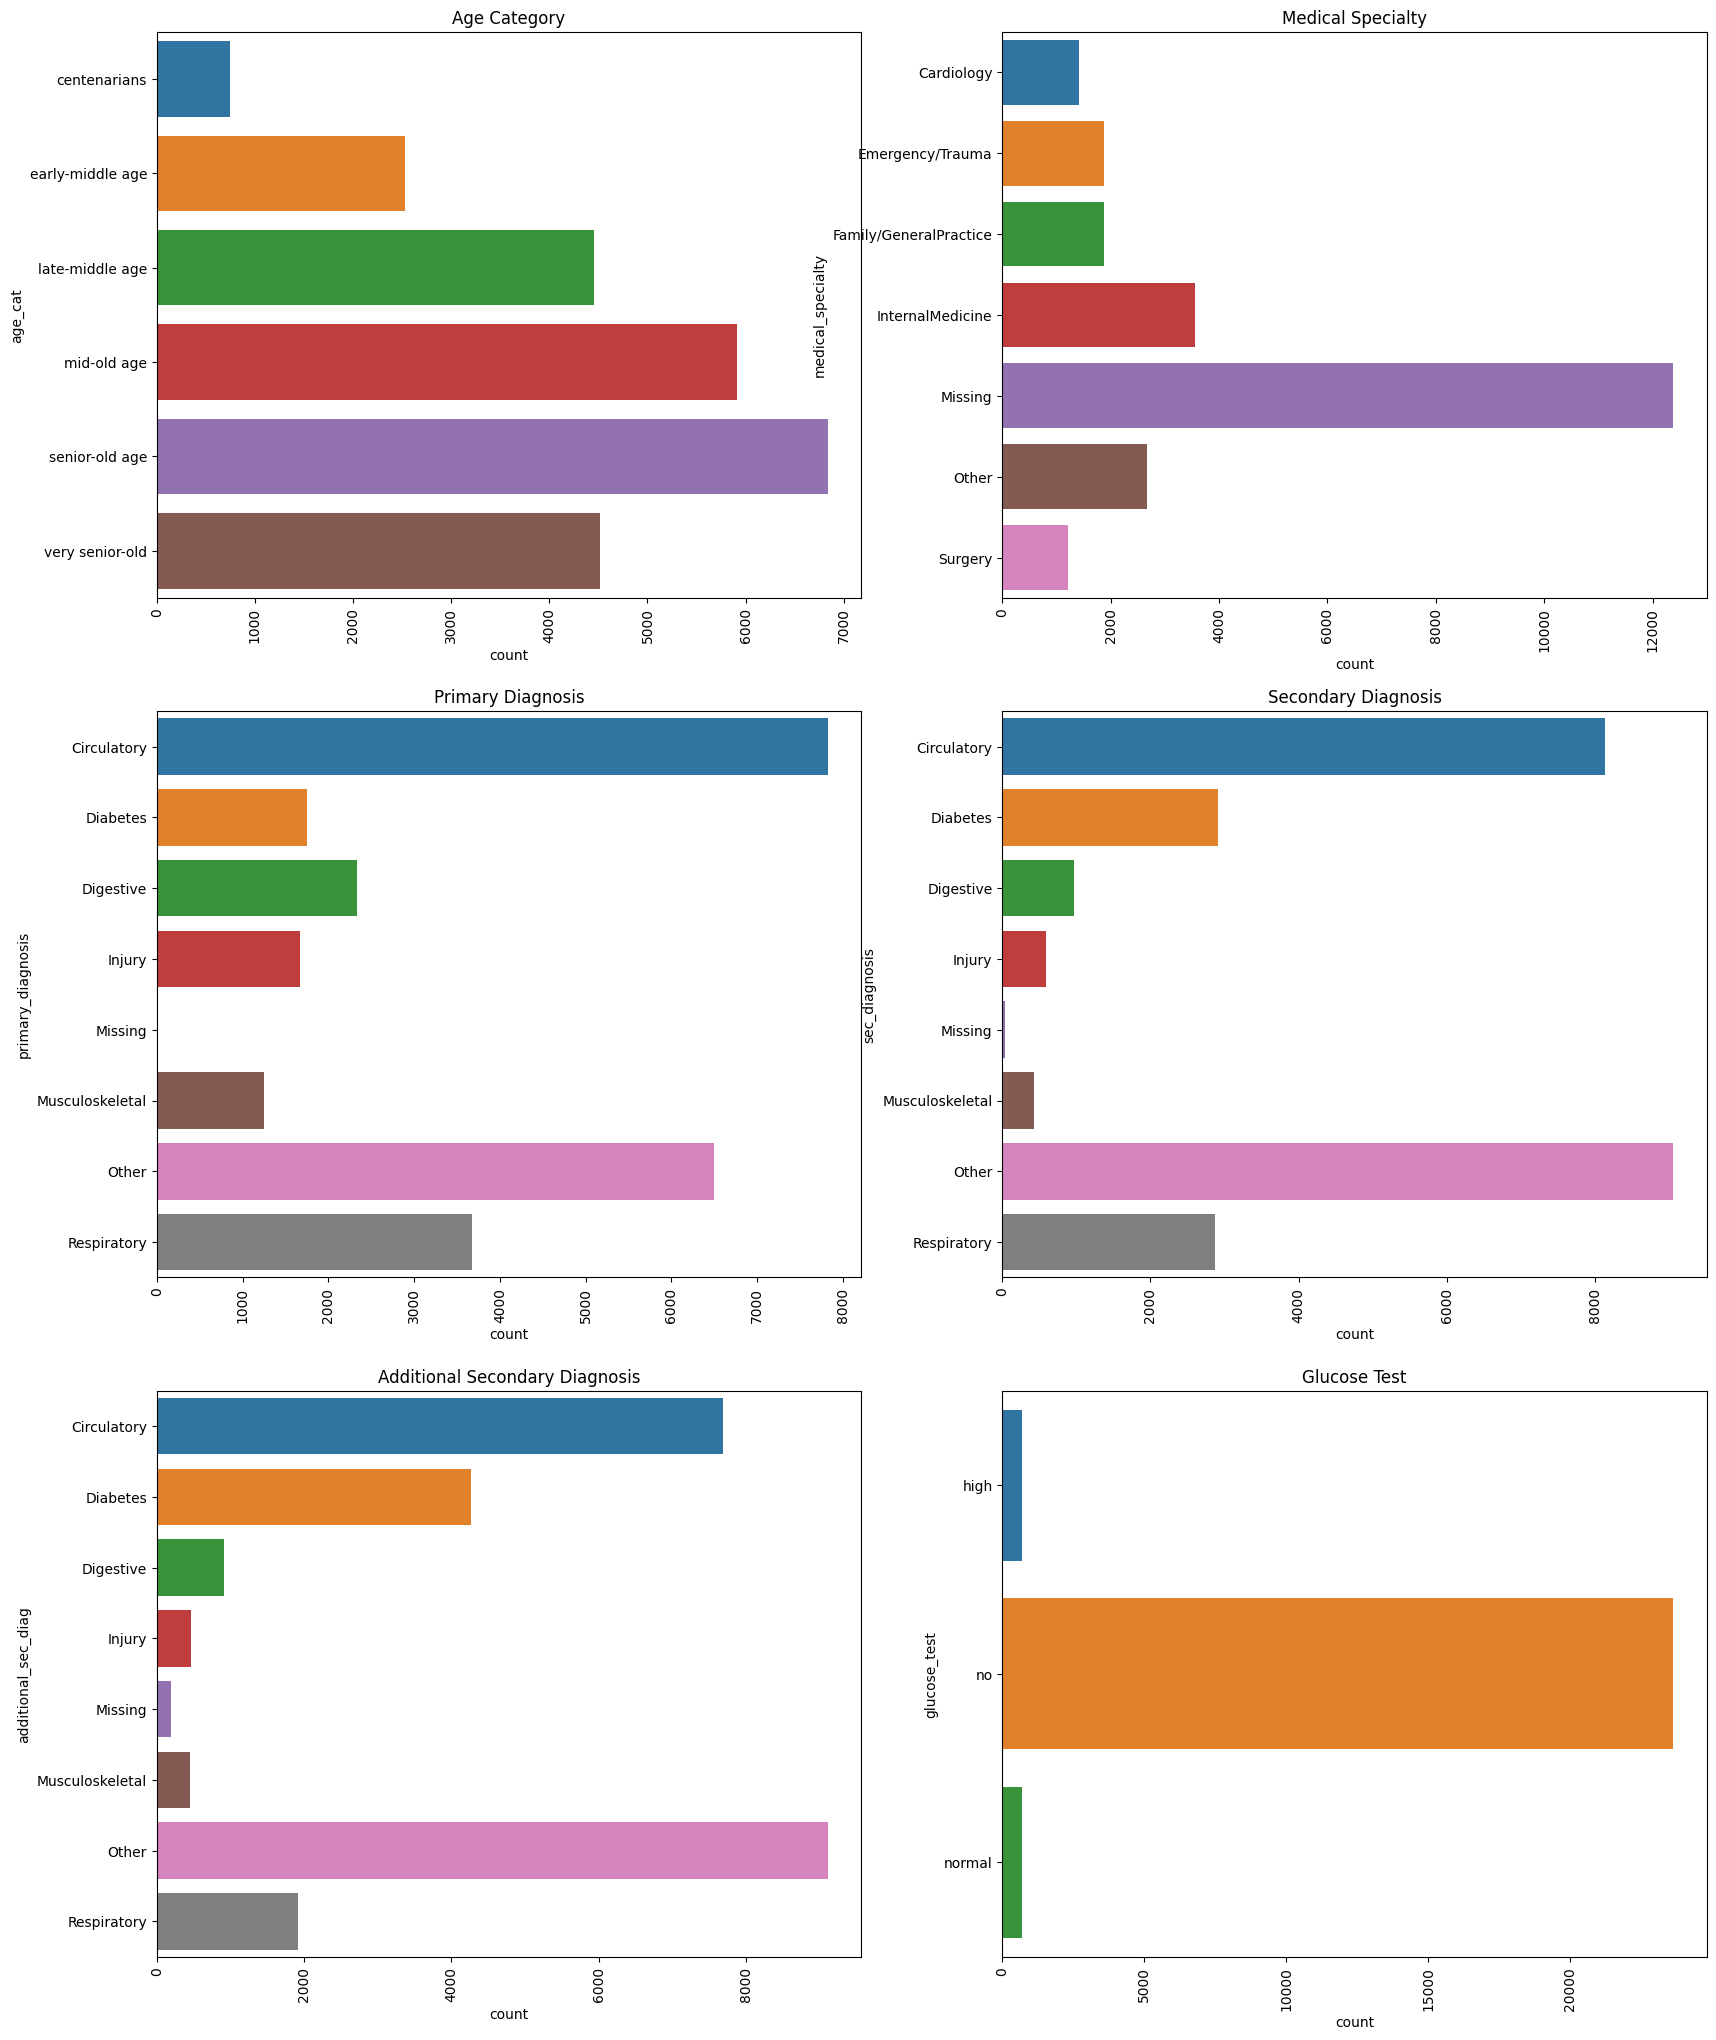

In [49]:
#visualize the information above for easy understanding
#value counting the categorical columns
plt.figure(figsize = (20, 25))
plt.subplot(3, 2, 1)
sns.countplot(y='age_cat', hue='age_cat', data=df)
plt.title('Age Category')
plt.xticks(rotation=90)


plt.subplot(3, 2, 2)
sns.countplot(y='medical_specialty', hue='medical_specialty', data=df)
plt.title('Medical Specialty')
plt.xticks(rotation=90)


plt.subplot(3, 2, 3)
sns.countplot(y='primary_diagnosis', hue='primary_diagnosis', data=df)
plt.title('Primary Diagnosis')
plt.xticks(rotation=90)


plt.subplot(3, 2, 4)
sns.countplot(y='sec_diagnosis', hue='sec_diagnosis', data=df)
plt.title('Secondary Diagnosis')
plt.xticks(rotation=90)


plt.subplot(3, 2, 5)
sns.countplot(y='additional_sec_diag', hue='additional_sec_diag', data=df)
plt.title('Additional Secondary Diagnosis')
plt.xticks(rotation=90)


plt.subplot(3, 2, 6)
sns.countplot(y='glucose_test', hue='glucose_test', data=df)
plt.title('Glucose Test')
plt.xticks(rotation=90)
plt.show()

### MOST COMMON PRIMARY DIAGNOSIS BY AGE GROUP

C:\Users\user\AppData\Local\Temp\ipykernel_19272\606450080.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True, sort=False).to_frame().unstack()


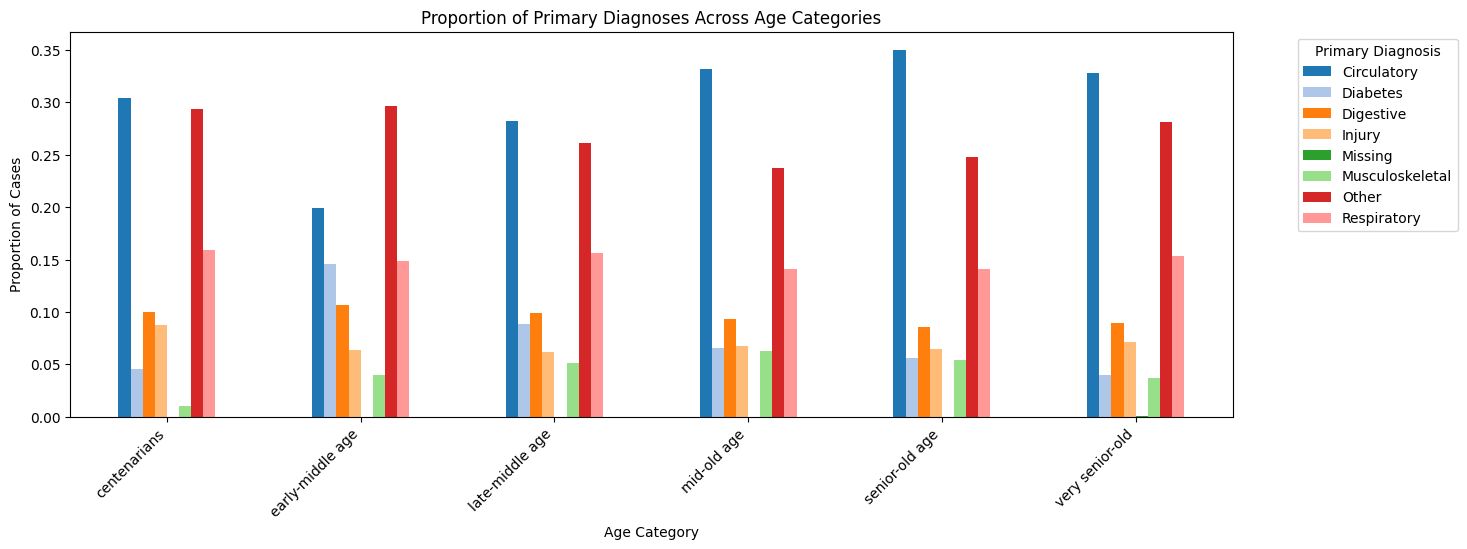

In [50]:
#using groupby and value_counts to gain insights
# Groupby and value_counts
plot_data = df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True, sort=False).to_frame().unstack()
plot_data.columns = plot_data.columns.droplevel(0)  # Clean up MultiIndex
ax = plot_data.plot(kind='bar', stacked=False, figsize=(15, 5), color=plt.cm.tab20.colors)

# Legend
ax.legend(title='Primary Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')

# Title and labels
plt.title('Proportion of Primary Diagnoses Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Proportion of Cases')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()


From the table and graph above we can see that Circulatory diagnosis was the most common primary diagnosis across the varoius categories of age outside early middle age where Others as a diagnosis cateory came first and circulatory diagnosis second.

### Diagnosises

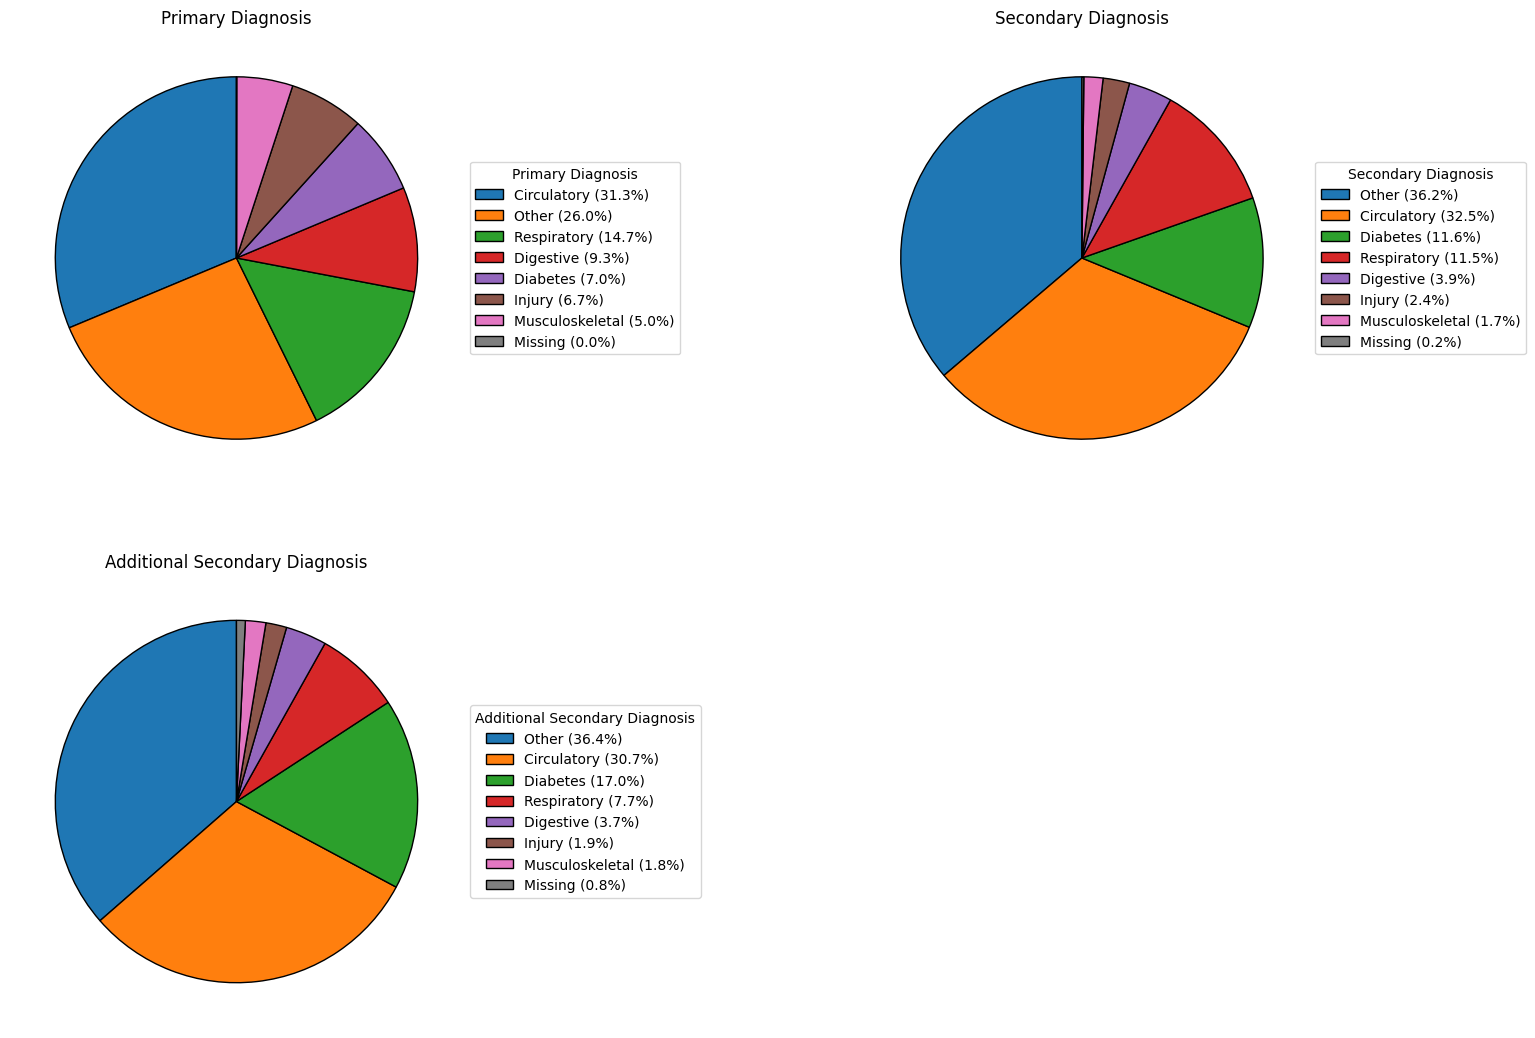

In [51]:
# Groupby and value_counts
# Adjust figure size for better spacing and layout
plt.figure(figsize=(20, 20))

primary_labels = df['primary_diagnosis'].value_counts().index
primary_sizes = df['primary_diagnosis'].value_counts().values
primary_colors = plt.cm.Paired.colors[:len(primary_labels)]
secondary_labels = df['sec_diagnosis'].value_counts().index
secondary_sizes = df['sec_diagnosis'].value_counts().values
secondary_colors = plt.cm.Paired.colors[:len(secondary_labels)]
additional_labels = df['additional_sec_diag'].value_counts().index
additional_sizes = df['additional_sec_diag'].value_counts().values
additional_colors = plt.cm.Paired.colors[:len(additional_labels)]
primary_legend_labels = [f'{label} ({size/sum(primary_sizes)*100:.1f}%)' for label, size in zip(primary_labels, primary_sizes)]
secondary_legend_labels = [f'{label} ({size/sum(secondary_sizes)*100:.1f}%)' for label, size in zip(secondary_labels, secondary_sizes)]
additional_legend_labels = [f'{label} ({size/sum(additional_sizes)*100:.1f}%)' for label, size in zip(additional_labels, additional_sizes)]

# Primary Diagnosis Pie Chart
plt.subplot(3, 2, 1)
df['primary_diagnosis'].value_counts().plot.pie(startangle=90, labels=None, wedgeprops={'edgecolor': 'black'})
plt.title('Primary Diagnosis')
legend(primary_legend_labels, title="Primary Diagnosis", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.ylabel('')  # Remove y-axis label for clarity

# Secondary Diagnosis Pie Chart
plt.subplot(3, 2, 2)
df['sec_diagnosis'].value_counts().plot.pie(startangle=90, labels=None, wedgeprops={'edgecolor': 'black'})
plt.title('Secondary Diagnosis')
legend(secondary_legend_labels, title="Secondary Diagnosis", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.ylabel('')

# Additional Secondary Diagnosis Pie Chart
plt.subplot(3, 2, 3)
df['additional_sec_diag'].value_counts().plot.pie(startangle=90,labels=None, wedgeprops={'edgecolor': 'black'})
plt.title('Additional Secondary Diagnosis')
legend(additional_legend_labels, title="Additional Secondary Diagnosis", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.ylabel('')


# Show the plot
plt.show()


### Explore the effect of a diabetes diagnosis on readmission rates.

In [52]:
#subsetting patient with non-DM diagnosis
non_diabetes_pt = df[~((df['primary_diagnosis'] == 'Diabetes') | (df['sec_diagnosis'] == 'Diabetes') |
    (df['additional_sec_diag'] == 'Diabetes'))]

#subsetting patient with DM diagnosis
diabetes_pt = df[(df['primary_diagnosis'] == 'Diabetes') | (df['sec_diagnosis'] == 'Diabetes') |
    (df['additional_sec_diag'] == 'Diabetes')]

#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))

number of non-DM patient:  16212
number of DM patient:  8788


readmitted
no     4699
yes    4089
Name: count, dtype: int64


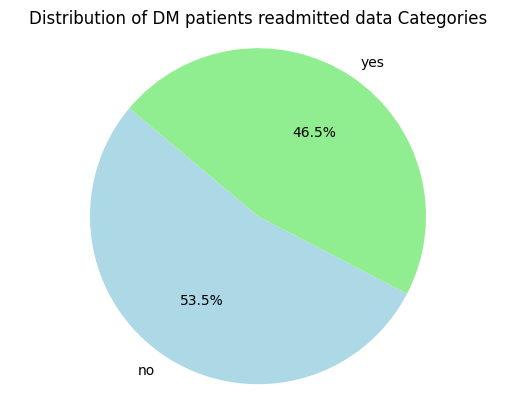

In [53]:
#plotting the distribution of DM patient readmitted data
readmitted_data = diabetes_pt['readmitted'].value_counts(normalize=False).to_dict()

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

print(diabetes_pt['readmitted'].value_counts(normalize=False))
# Show the pie chart
plt.show()

readmitted
no     8547
yes    7665
Name: count, dtype: int64


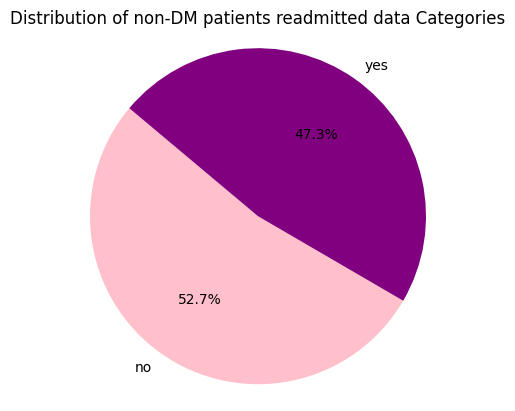

In [54]:
# plot the distribution of non-DM patient readmitted data
readmitted_data = non_diabetes_pt['readmitted'].value_counts(normalize=False).to_dict()

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non-DM patients readmitted data Categories')

print(non_diabetes_pt['readmitted'].value_counts(normalize=False))
# Show the pie chart
plt.show()


In [55]:
#table showing the count of readmitted patient for each diagnosis
# pd.set_option('display.max_rows', 64)
df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()
# rp.columns = rp.columns.droplevel(0)  # Clean up MultiIndex
# rp.fillna(0, inplace=True)
# rp = rp.astype(int)
# rp

C:\Users\user\AppData\Local\Temp\ipykernel_19272\2199983630.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()


readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
...                                       ...      ...       ...    ...   
Respiratory       Injury                    7        2         0      2   
                  Missing                   0        1         0      0   
                  Musculoskeletal           8       11         1      0   
                  Other                   247      196        17     14   
                  Respiratory             293      180        16     11   

                                                                             
additional_sec_diag               Missing Musculoskeletal Other Respiratory  
primary_diagnosis sec_diagnosis                                              
Circulatory       Circulatory           2              25   958         366  
                  Diabetes             20              11   331          35  
                  Digestive             0               1    31           4  
                  Injury                0               0    40           6  
                  Missing               0               0     2           0  
...                                   ...             ...   ...         ...  
Respiratory       Injury                0               0     8           4  
                  Missing               0               0     0           0  
                  Musculoskeletal       0               5    13           8  
                  Other                 1              15   358         108  
                  Respiratory           0              10   254         137  

[64 rows x 8 columns]

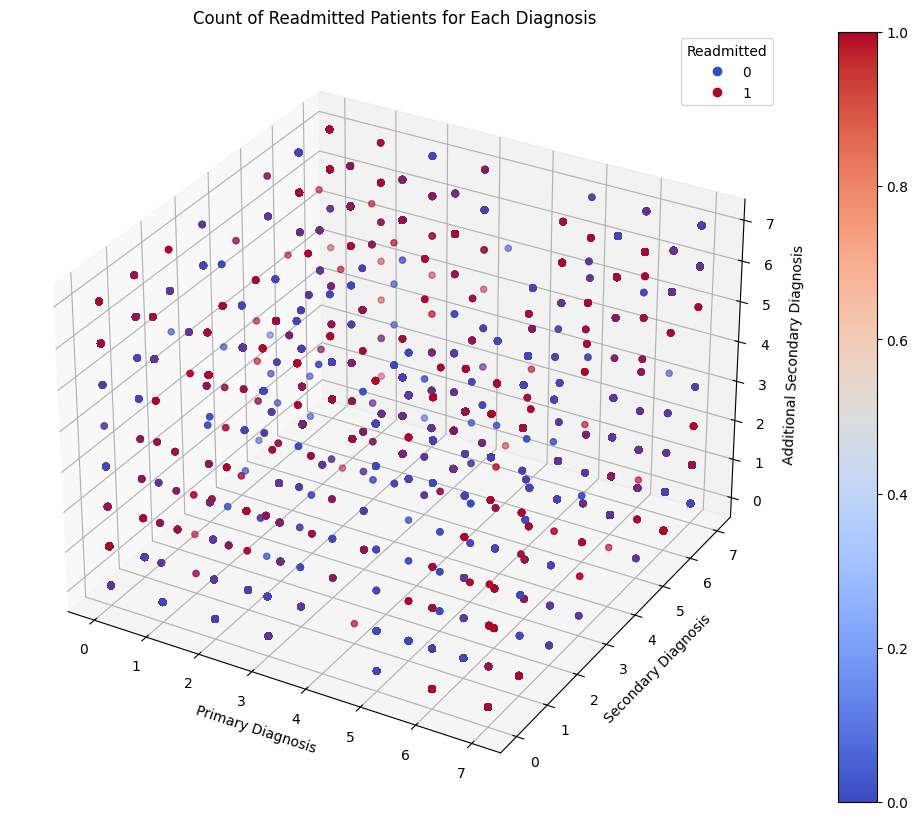

In [56]:
# Map 'yes' to 1 and 'no' to 0 in the 'readmitted' column
es = df['readmitted'].map({'yes': 1, 'no': 0})

# Convert categorical data to numeric codes
x = df['primary_diagnosis'].cat.codes
y = df['sec_diagnosis'].cat.codes
z = df['additional_sec_diag'].cat.codes

# Set color based on 'readmitted' column
c = es

# Adjust the figure size for better viewing
fig = plt.figure(figsize=(15, 10))

# Create a 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D heatmap
img = ax.scatter(x, y, z, c=c, cmap='coolwarm', marker='o')

# Add a color bar
fig.colorbar(img)

# Set axis labels
ax.set_xlabel('Primary Diagnosis')
ax.set_ylabel('Secondary Diagnosis')
ax.set_zlabel('Additional Secondary Diagnosis')

# Set title
plt.title('Count of Readmitted Patients for Each Diagnosis')

# Position legend outside the plot
plt.legend(*img.legend_elements(), title='Readmitted')

# Show the 3D heatmap
plt.show()


After exploring the data I could deduct that about 8788 patients had Diabetes as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis. This made up about one-third of the patients population.Amongst the DM patient approximately 47 percent were readmitted while 53 percent where not. While about 16212 patients did not have DM as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis.This makes about two-third of the patients population.Amongst the non-DM patients approximately 47 percent were readmitted while 53 percent were not. From the analysis we cannot really say if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates

### what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

In [57]:
#viewing the dataset
df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age


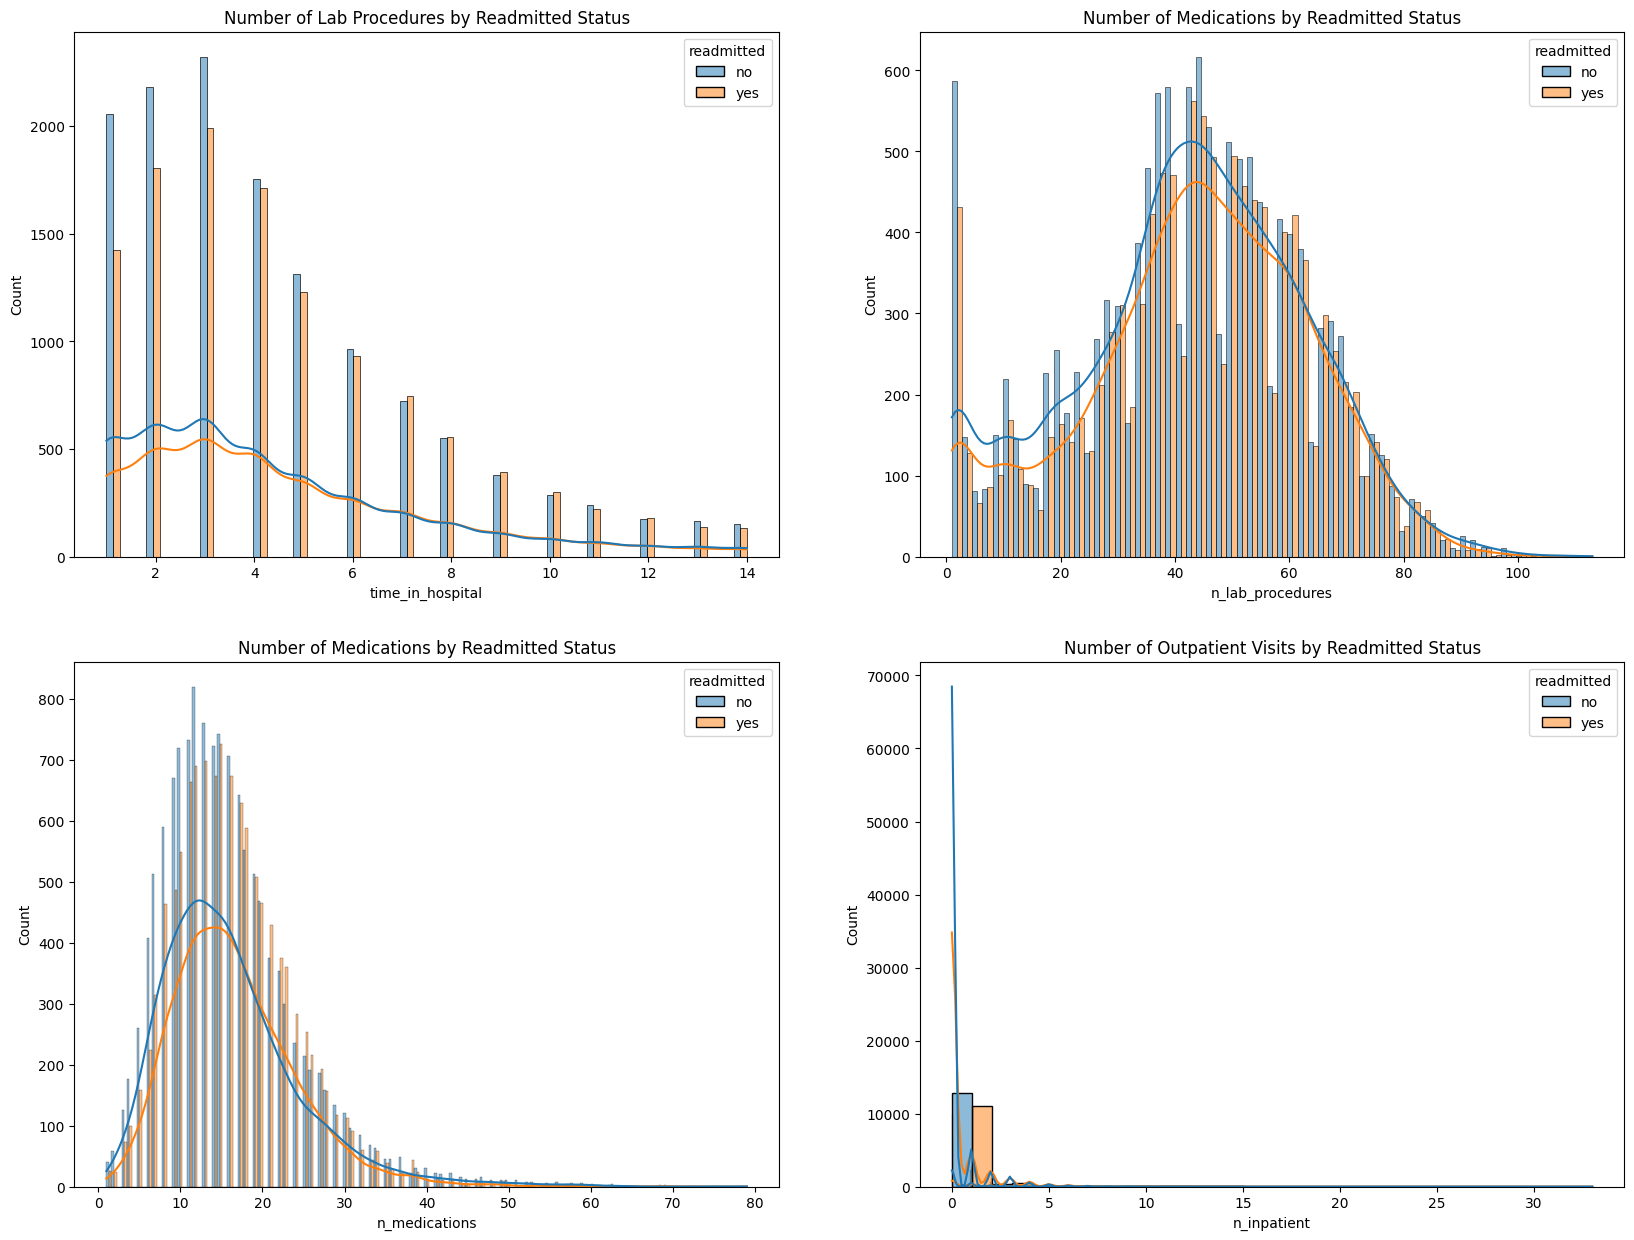

In [58]:
#plotting a grap showing the distribution of numerical columns by their readmitted status
# Create a figure and axis
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Plot the distribution of 'time_in_hospital' by 'readmitted' status
sns.histplot(df, x='time_in_hospital', hue='readmitted', multiple='dodge',kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Number of Lab Procedures by Readmitted Status')

# Plot the distribution of 'n_lab_procedures' by 'readmitted' status
sns.histplot(df, x='n_lab_procedures', hue='readmitted', multiple='dodge',kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Number of Medications by Readmitted Status')

# Plot the distribution of 'n_medications' by 'readmitted' status
sns.histplot(df, x='n_medications', hue='readmitted', multiple='dodge',kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Number of Medications by Readmitted Status')

# Plot the distribution of 'n_inpatient' by 'readmitted' status
sns.histplot(df, x='n_inpatient', hue='readmitted', multiple='dodge',kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Number of Inpatient Visits by Readmitted Status')

# plot the distribution of 'n_outpatient' by 'readmitted' status
sns.histplot(df, x='n_outpatient', hue='readmitted', multiple='dodge',kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Number of Outpatient Visits by Readmitted Status')

# Show the plots
plt.show()

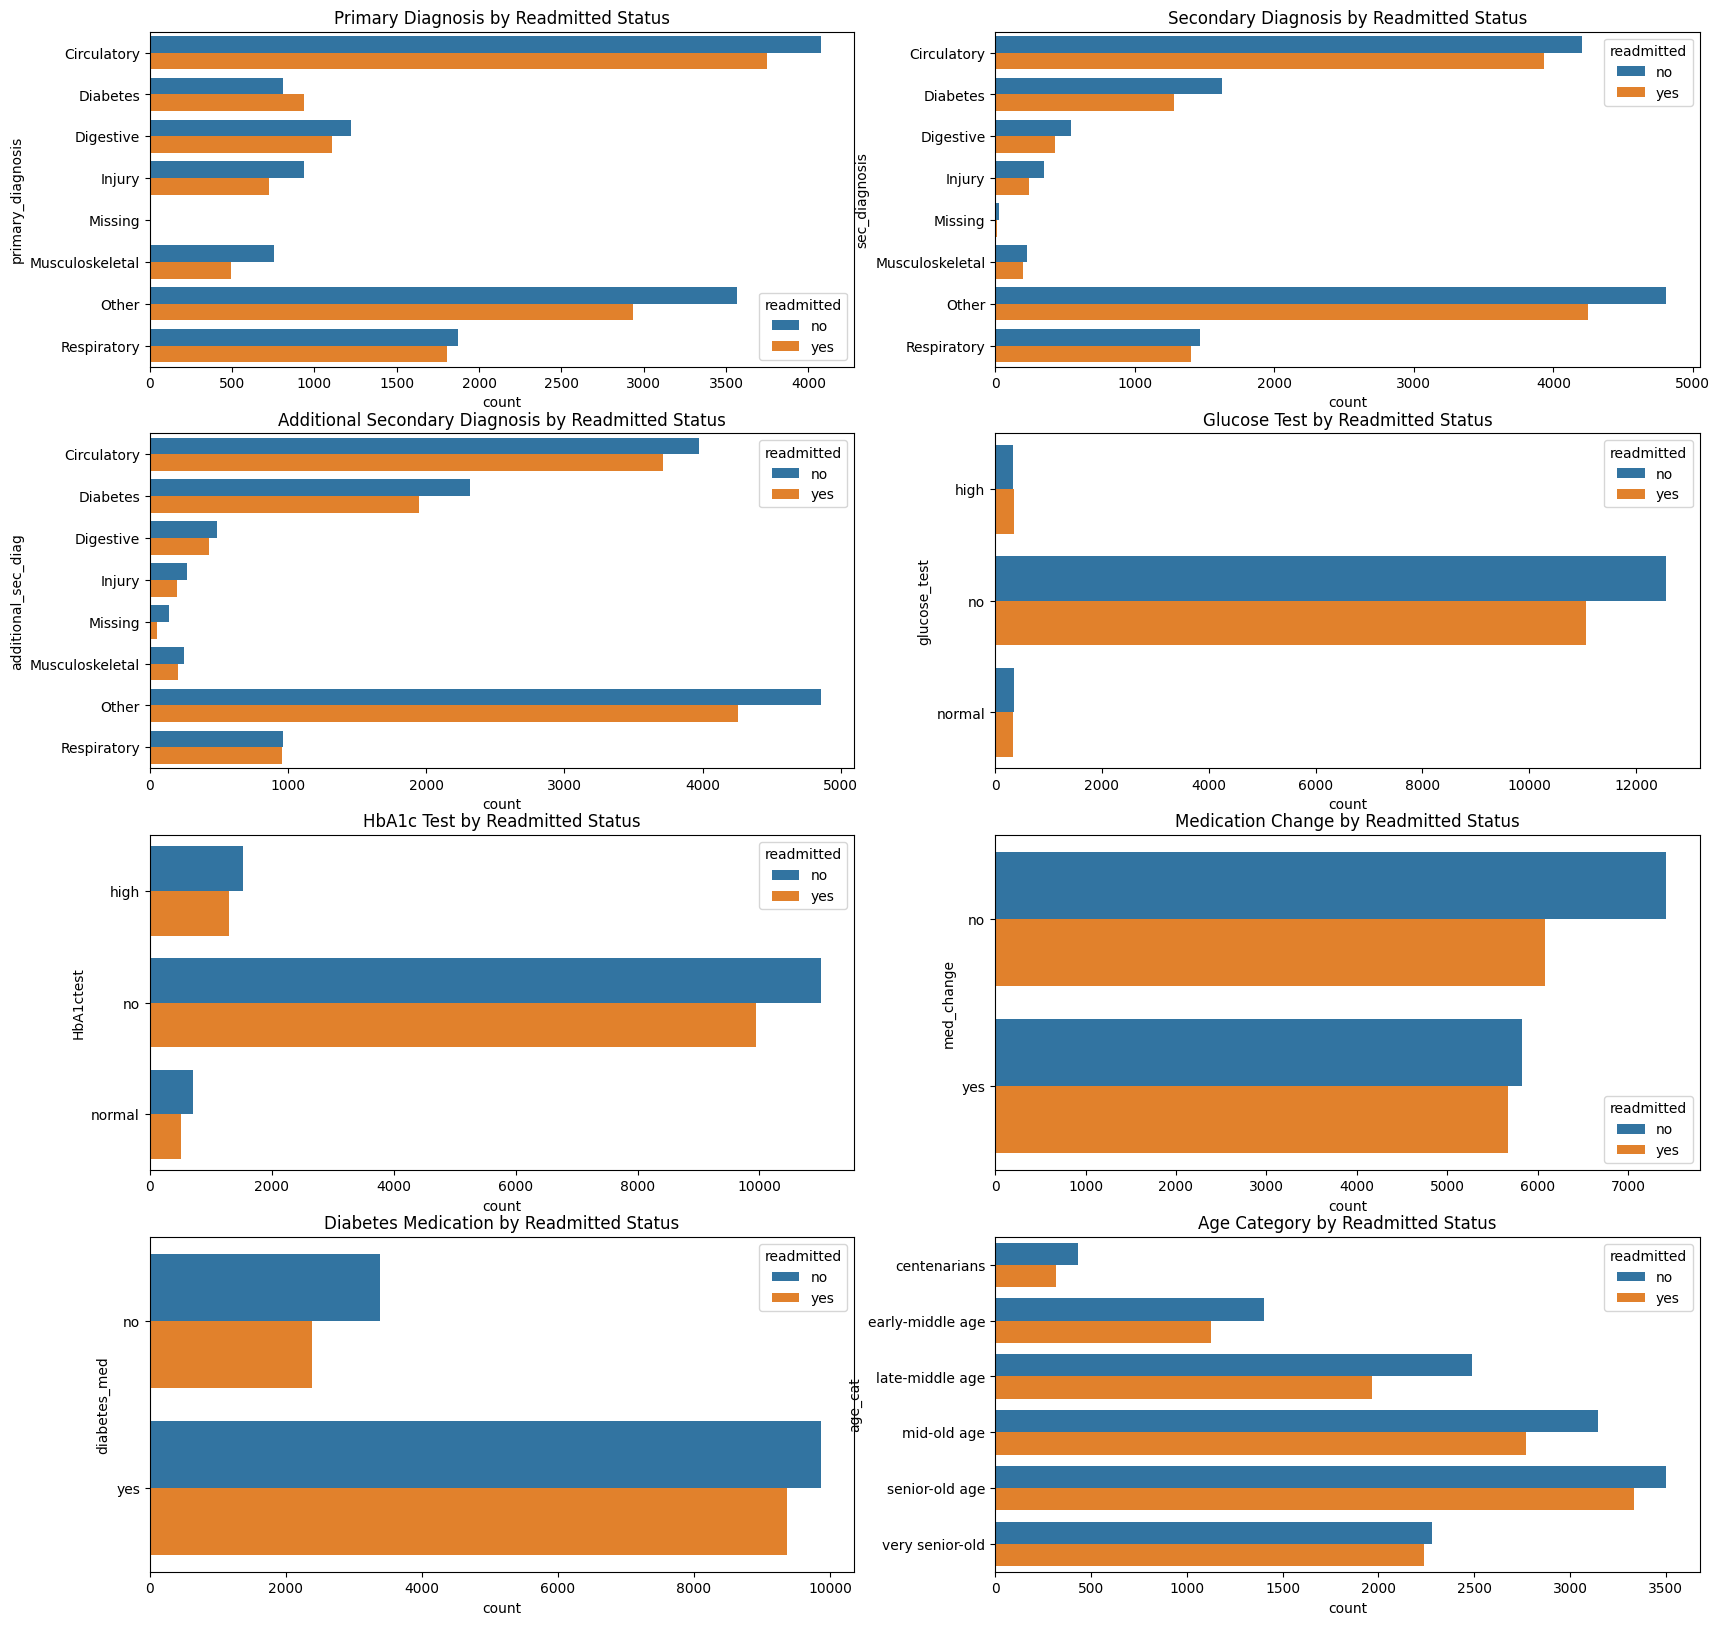

In [59]:
#visualizing the categorical columns by thier readmitted status

# Create a figure and axis
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Plot the distribution of 'primary_diagnosis' by 'readmitted' status
sns.countplot(y='primary_diagnosis', hue='readmitted', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Primary Diagnosis by Readmitted Status')

# Plot the distribution of 'sec_diagnosis' by 'readmitted' status
sns.countplot(y='sec_diagnosis', hue='readmitted', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Secondary Diagnosis by Readmitted Status')

# Plot the distribution of 'additional_sec_diag' by 'readmitted' status
sns.countplot(y='additional_sec_diag', hue='readmitted', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Additional Secondary Diagnosis by Readmitted Status')

# Plot the distribution of 'glucose_test' by 'readmitted' status
sns.countplot(y='glucose_test', hue='readmitted', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Glucose Test by Readmitted Status')

# Plot the distribution of 'HbA1ctest' by 'readmitted' status
sns.countplot(y='HbA1ctest', hue='readmitted', data=df, ax=ax[2, 0])
ax[2, 0].set_title('HbA1c Test by Readmitted Status')

# Plot the distribution of 'med_change' by 'readmitted' status
sns.countplot(y='med_change', hue='readmitted', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Medication Change by Readmitted Status')

# Plot the distribution of 'diabetes_med' by 'readmitted' status
sns.countplot(y='diabetes_med', hue='readmitted', data=df, ax=ax[3, 0])
ax[3, 0].set_title('Diabetes Medication by Readmitted Status')

# Plot the distribution of 'age_cat' by 'readmitted' status
sns.countplot(y='age_cat', hue='readmitted', data=df, ax=ax[3, 1])
ax[3, 1].set_title('Age Category by Readmitted Status')

# Show the plots
plt.show()

In [60]:
#converting readmitted column to numerical
df['readmitted'] = np.where(df['readmitted']=='yes',1,0)

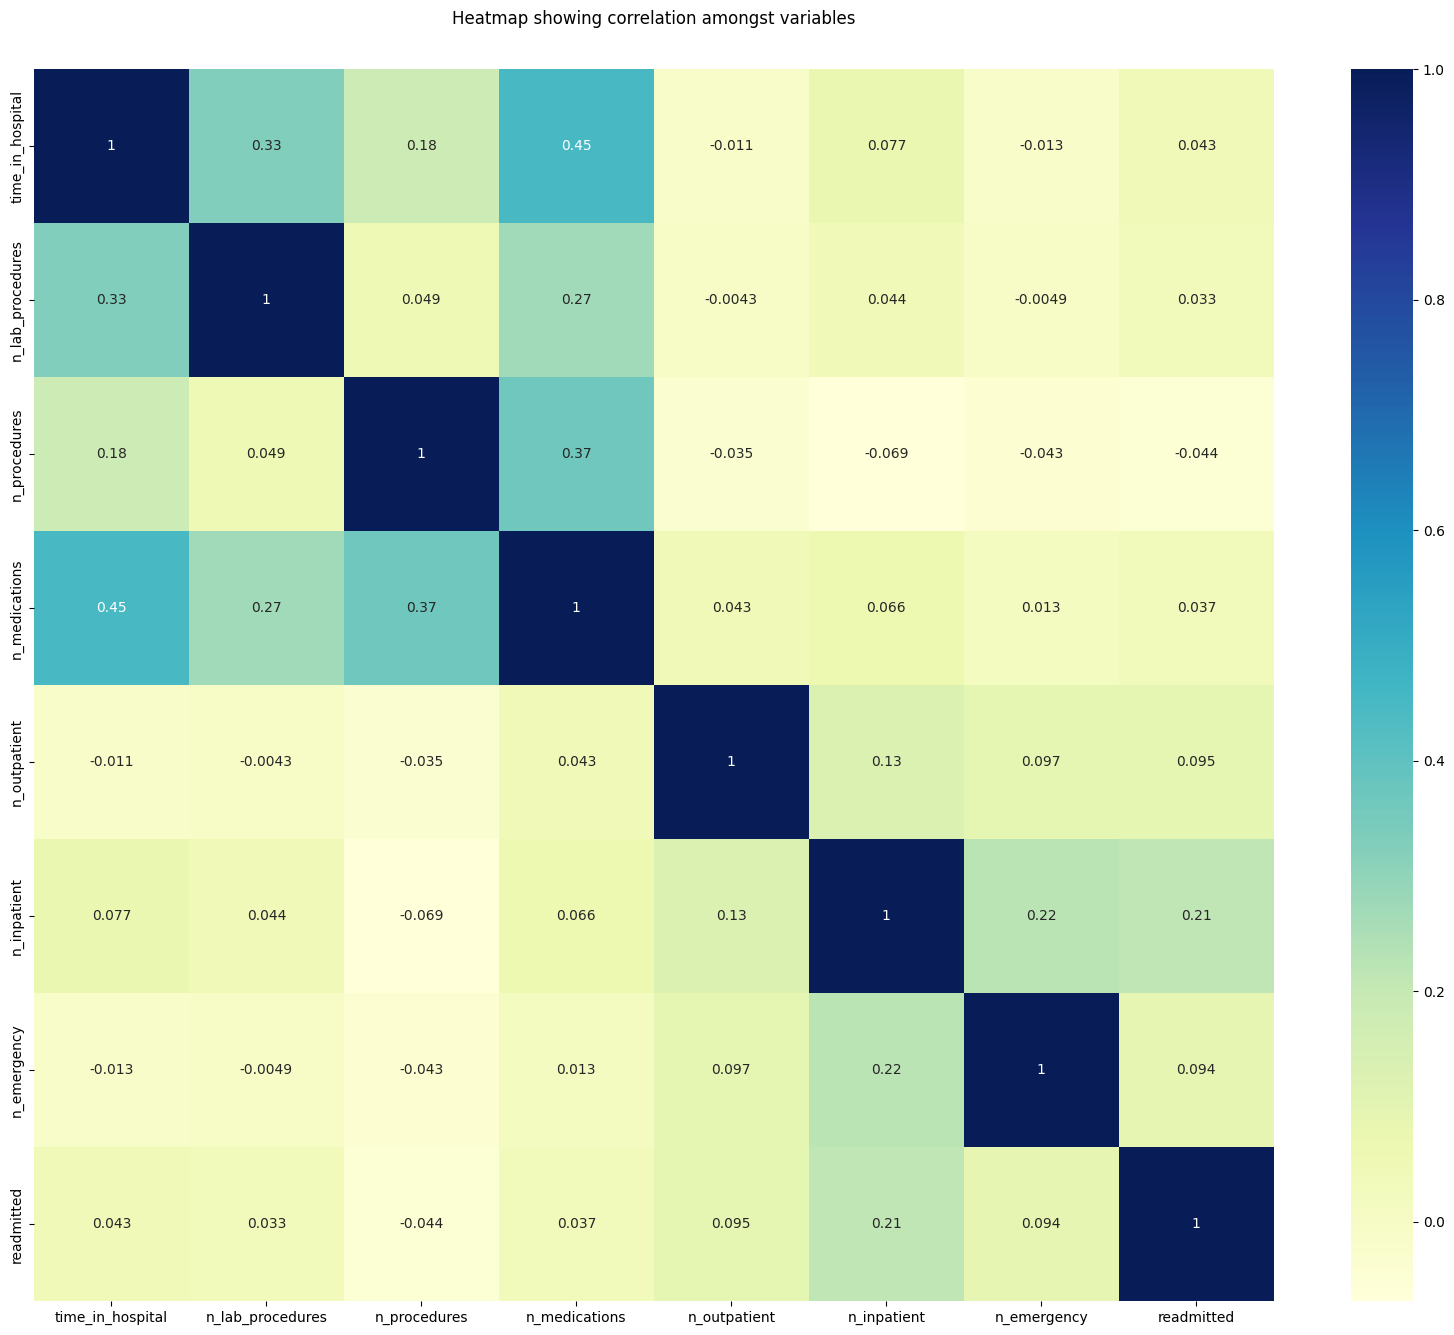

In [61]:
#show correlation of numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix between selected columns
correlation_matrix = df_numeric.corr()

#visualizing correlation between variables
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

### Data Visualization summary

From the graphs above, there are no significant factor that could show what group of patient were more likely to be readmitted as their distribution and patterns were alike across all categories of readmitted status.

However, we can notice the heatmap shows a weak correlation between n_inpatient and readmitted

In [62]:
# Convert categorical columns to numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the variance of numerical columns
variance = df_numeric.var()

variance


time_in_hospital      9.008821
n_lab_procedures    392.777706
n_procedures          2.941840
n_medications        64.972173
n_outpatient          1.429168
n_inpatient           1.387569
n_emergency           0.784772
readmitted            0.249120
dtype: float64

## Data Spliting

In [63]:
# Split the data into features and target
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'

df = pd.get_dummies(df, drop_first=True)

# Split the data into features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the training and testing sets

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (20000, 45)
y_train shape: (20000,)
X_test shape: (5000, 45)
y_test shape: (5000,)


## Tranning and Testing

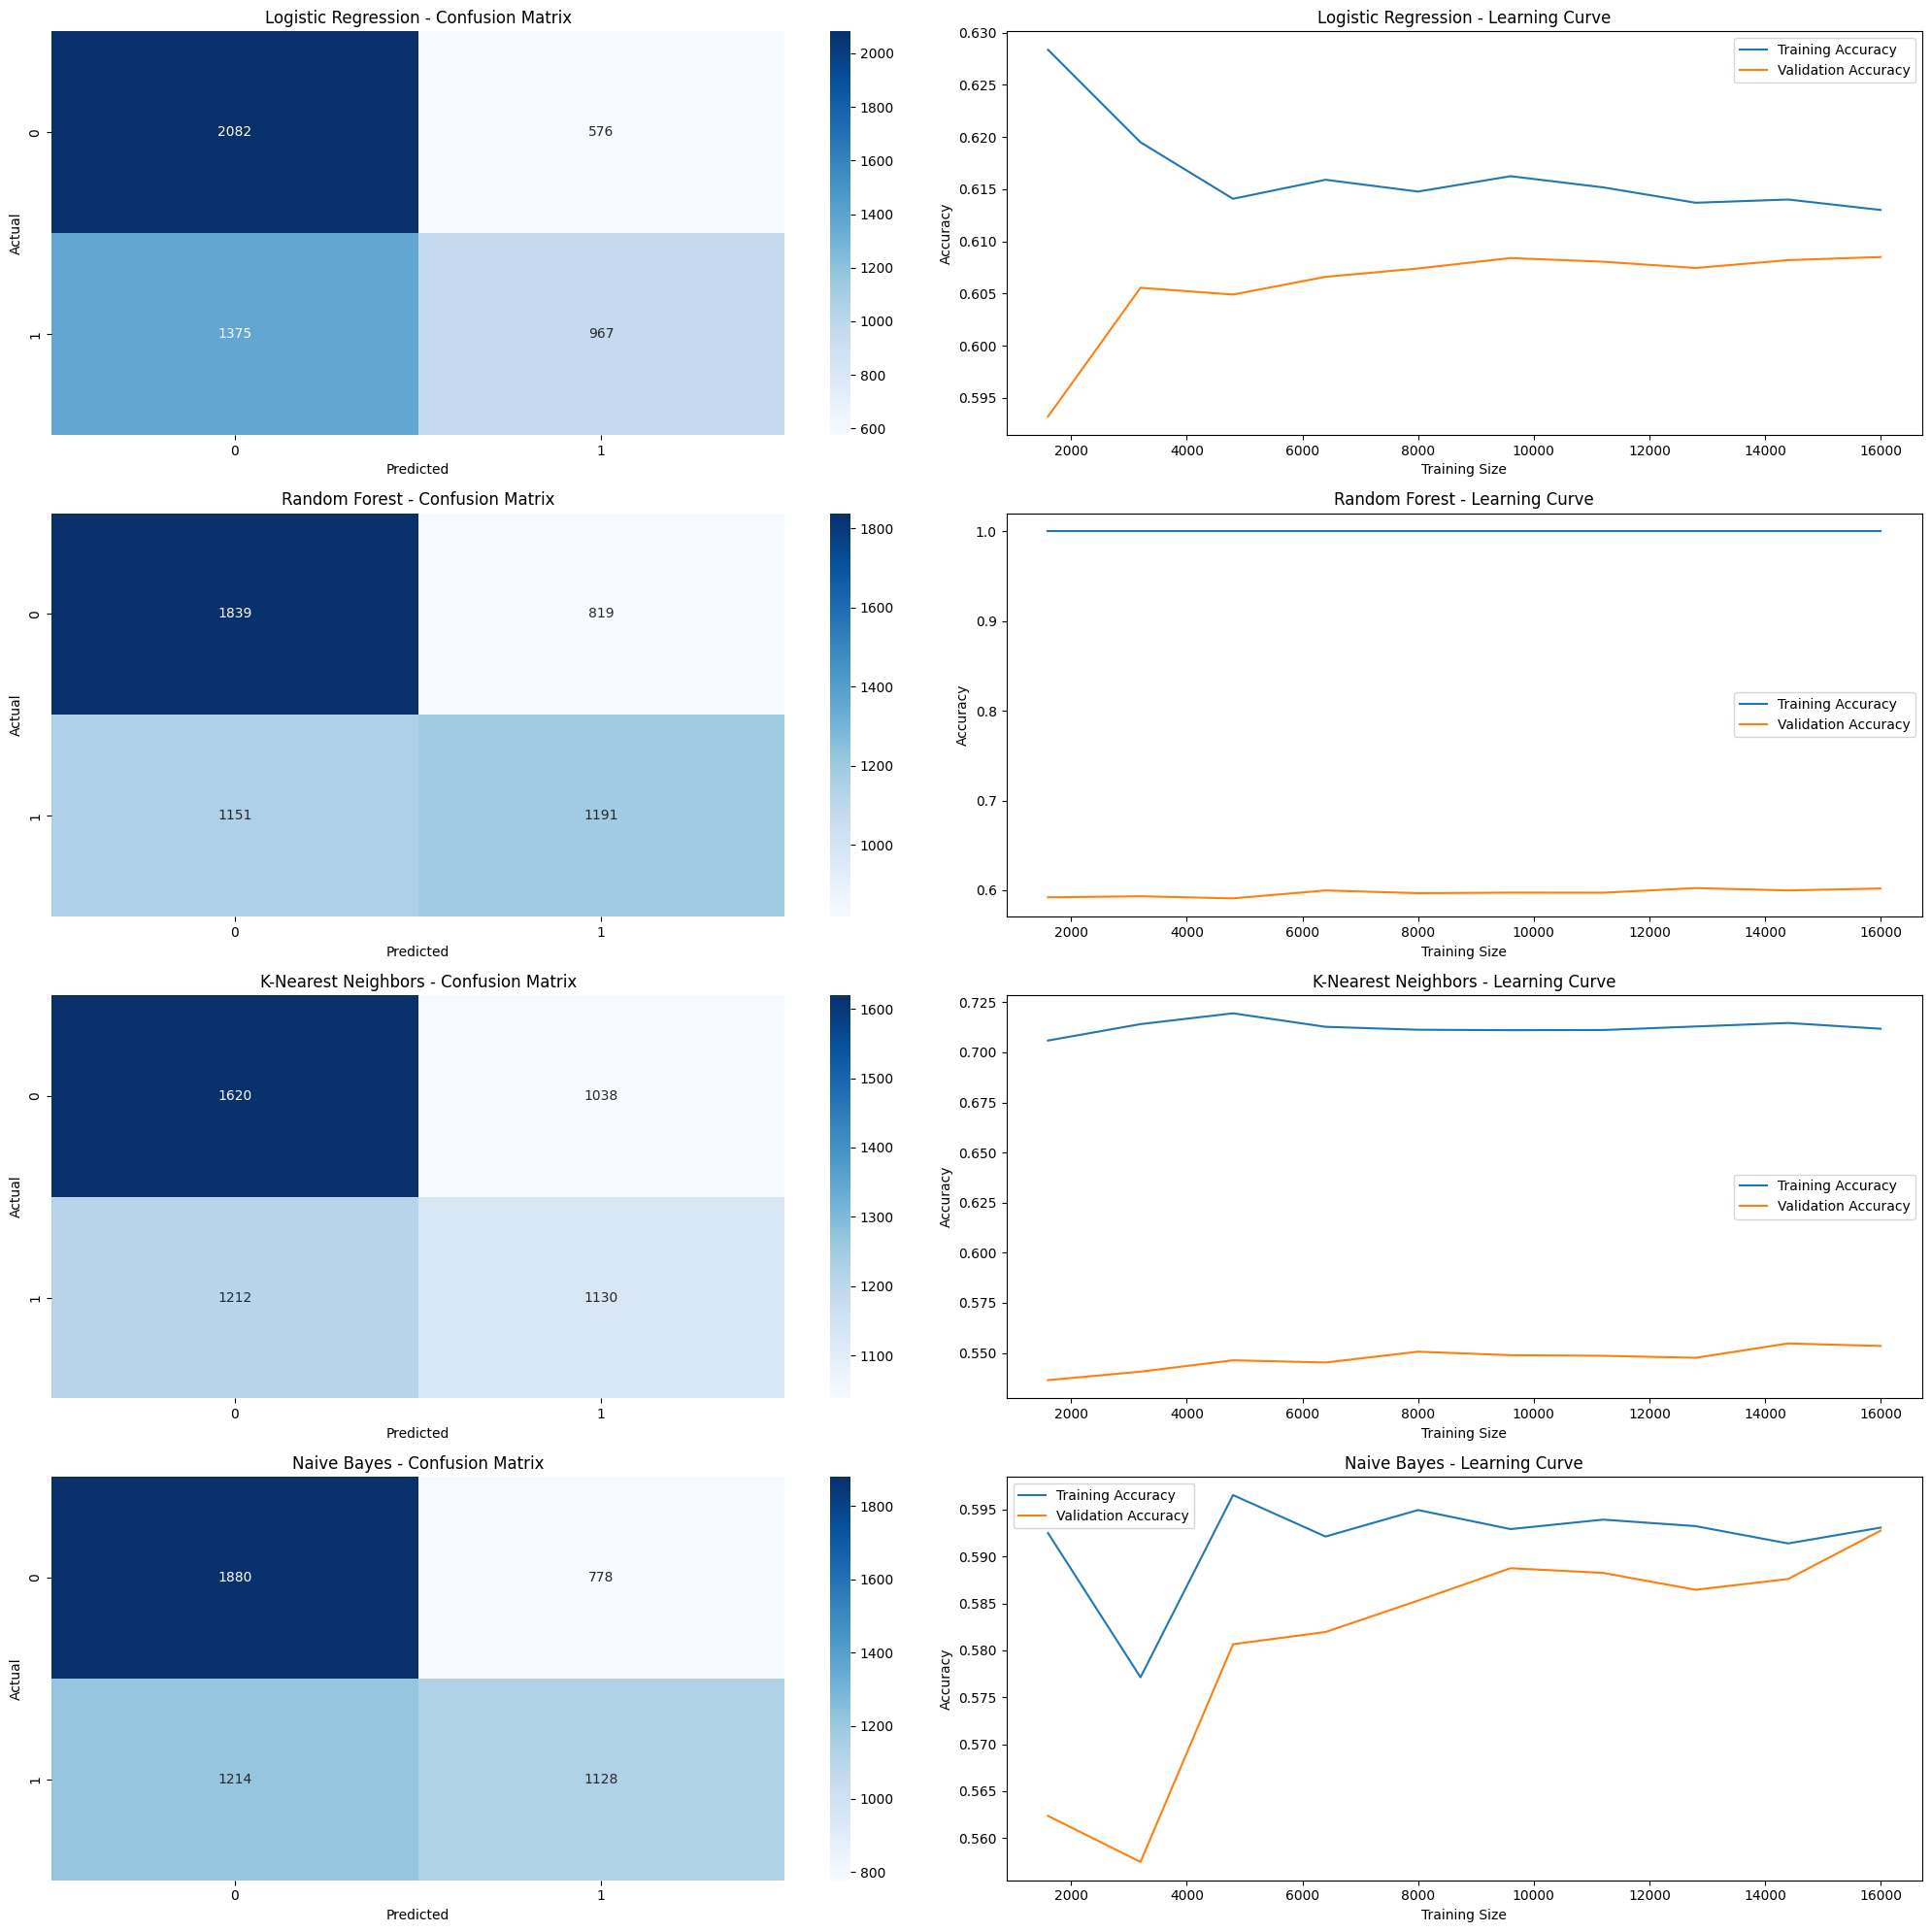

                 Model  Accuracy  Precision    Recall   AUC-ROC
0  Logistic Regression    0.6098   0.626701  0.412895  0.646706
1        Random Forest    0.6060   0.592537  0.508540  0.644090
2  K-Nearest Neighbors    0.5500   0.521218  0.482494  0.559191
3          Naive Bayes    0.6016   0.591815  0.481640  0.621398


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import learning_curve
import seaborn as sns

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Dictionaries to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "AUC-ROC": []
}

# Plot confusion matrix and learning curves for each model
plt.figure(figsize=(20, 20))
plot_index = 1

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC-ROC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Store metrics
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["AUC-ROC"].append(auc_roc)
    
    # Plot confusion matrix
    plt.subplot(len(models), 2, plot_index)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Plot learning curve
    plt.subplot(len(models), 2, plot_index + 1)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.title(f"{name} - Learning Curve")
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plot_index += 2

plt.tight_layout()
plt.show()

# Display metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
